In [129]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = '5fYRnD6cbJp0FBHeIPxWw86mR'
consumer_secret = 'L7TPjfsDT7ogeAszyVUCSM7SysFtu6JU7Mp2gzj1EJd9x3vKPu'
access_token = '979170238964015104-6PdMTSscO8AVaAoyDOZwq7YkRsrZ09M'
access_token_secret = 'W0a8xouYgw4IlDt6qasu0Ql5frh0DoGwfVAm3vNjcVwMC'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [144]:
# Target User Accounts
news_shows = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]
tweet_scores = []


tweets_counter = []
compound_tweet = []
show_name = []



# Loop through each user
for show in news_shows:
    #reset counter
    counter = 1
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 11):
        public_tweets = api.user_timeline(show, page=x)
        
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            tweets_ago = counter

            # saving values
            compound_tweet.append(compound)
            tweets_counter.append(counter)
            show_name.append(show)
            
            #counter reset
            counter += 1
            


In [145]:
#creating dictionary 
results = {
    "News Name": show_name,
    "Compound Score": compound_tweet,
    "Tweets ago": tweets_counter
}

tweets=pd.DataFrame(results)


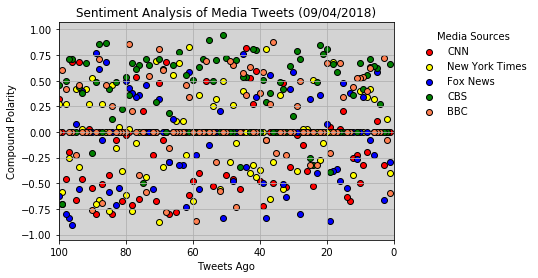

In [149]:
# Filtering the differenct news
cnn = tweets[tweets["News Name"]== "CNN"]
nytimes = tweets[tweets["News Name"]== "nytimes"]
foxnews = tweets[tweets["News Name"]== "FoxNews"]
cbs = tweets[tweets["News Name"]== "CBS"]
bbc = tweets[tweets["News Name"]== "BBC"]

cnn_x_vals = cnn["Tweets ago"]
cnn_y_vals = cnn["Compound Score"]
nytimes_x_vals = nytimes["Tweets ago"]
nytimes_y_vals = nytimes["Compound Score"]
foxnews_x_vals = foxnews["Tweets ago"]
foxnews_y_vals = foxnews["Compound Score"]
cbs_x_vals = cbs["Tweets ago"]
cbs_y_vals = cbs["Compound Score"]
bbc_x_vals = bbc["Tweets ago"]
bbc_y_vals = bbc["Compound Score"]

plt.scatter(cnn_x_vals, cnn_y_vals, c="red", 
           edgecolor="black", linewidths = 1, marker="o",label="CNN")
plt.scatter(nytimes_x_vals, nytimes_y_vals,c="yellow", 
           edgecolor="black", linewidths = 1, marker="o",label="New York Times")
plt.scatter(foxnews_x_vals, foxnews_y_vals, c="blue", 
           edgecolor="black", linewidths = 1, marker="o",label="Fox News")
plt.scatter(cbs_x_vals, cbs_y_vals, c="green", 
           edgecolor="black", linewidths = 1, marker="o",label="CBS")
plt.scatter(bbc_x_vals, bbc_y_vals, c="coral", 
           edgecolor="black", linewidths = 1, marker="o",label="BBC")


plt.rcParams['axes.facecolor']='lightgrey'
plt.title('Sentiment Analysis of Media Tweets ('
         +datetime.datetime.today().strftime('%d/%m/%Y')+')')
plt.xlabel("Tweets Ago")
plt.xlim(100,0)
plt.ylabel("Compound Polarity")
plt.grid(True)

# Create a legend
lgnd = plt.legend(bbox_to_anchor=(1.05, 1),title="Media Sources",facecolor='white',edgecolor='white')



plt.savefig("Sentiment Analysis of Media Tweets.png")

In [150]:
## groupby News and getting compound mean
results_df=tweets[['News Name','Compound Score']]
compound_mean=results_df.groupby('News Name')['Compound Score'].mean()
summary=pd.DataFrame({'Mean Compound':compound_mean})
summary

,Mean Compound
News Name,
BBC,0.120348
CBS,0.343944
CNN,-0.132450
FoxNews,-0.073360
nytimes,0.008816


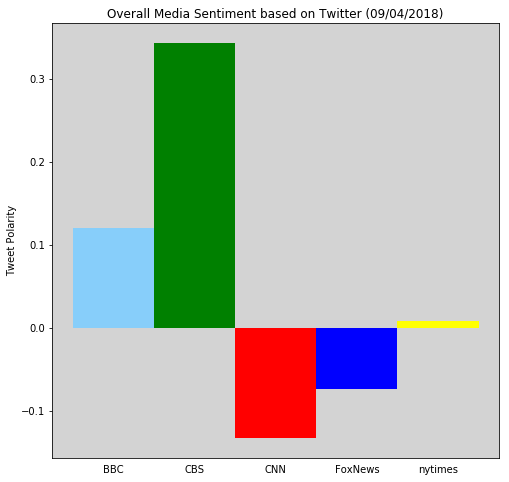

In [151]:
## Bar plot
summary.plot( y='Mean Compound',kind="bar",align='center',width=1.0,figsize=(8,8),legend=None, title='Overall Media Sentiment based on Twitter ('
         +datetime.datetime.today().strftime('%d/%m/%Y')+')',color=["lightskyblue", "green", "red", "blue",'yellow'])
plt.rcParams['axes.facecolor']='lightgrey'
plt.xticks(rotation='horizontal')
plt.xlabel('')
plt.ylabel('Tweet Polarity')
plt.tick_params(axis='x',which='both',bottom='off')
plt.savefig("Overall Media Sentiment.png")


In [152]:
tweets.to_csv("News_Tweets.csv", index=False, header=True)